In [4]:
# 第11章 深層学習とAutoML
# 11.1 Kerasによる回帰

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import activations, callbacks, layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

my_url = ('https://raw.githubusercontent.com/taroyabuki'
           '/fromzero/master/data/wine.csv'
)
tmp = pd.read_csv(my_url)

In [5]:
my_data = shuffle(tmp)

In [6]:
my_scaler = StandardScaler()
X = my_scaler.fit_transform(
    my_data.drop(columns=['LPRICE2'])
)
y = my_data['LPRICE2']

Text(0, 0.5, 'ReLU(x)')

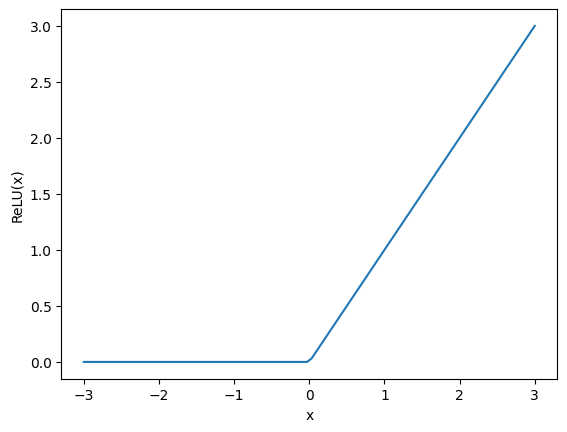

In [7]:
x = np.linspace(-3, 3, 100)
plt.plot(x, activations.relu(x))
plt.xlabel('x')
plt.ylabel('ReLU(x)')


In [8]:
my_model = models.Sequential()
my_model.add(layers.Dense(units=3, activation='relu', input_shape=[4]))
my_model.add(layers.Dense(units=1))

my_model.summary() # ネットワークの概要

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [9]:
my_model.compile(
    loss='mse',
    optimizer='rmsprop'
)

In [10]:
my_cb = callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

In [11]:
my_history = my_model.fit(
    x=X,
    y=y,
    validation_split=0.25,
    batch_size=10,
    epochs=500,
    callbacks=[my_cb],
    verbose=0
)

<Axes: xlabel='epoch'>

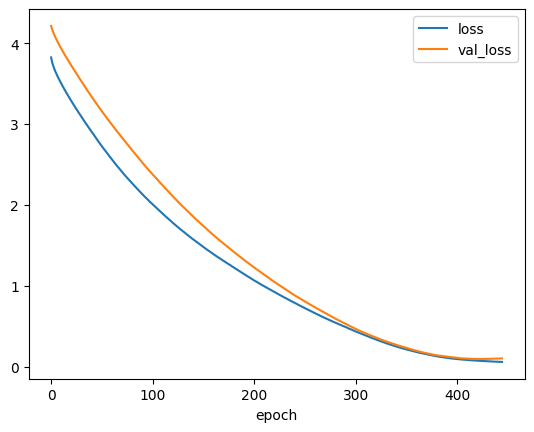

In [13]:
tmp = pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch')

In [14]:
tmp.iloc[-1,]

loss        0.057568
val_loss    0.100525
Name: 444, dtype: float64

In [17]:
y_ = my_model.predict(X)
((y_.ravel() - y)**2).sum()

1/1 [==============================] - 0s 21ms/step


2.0378721721636084

In [1]:
# 11.2 Kerasによる分類

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from keras import activations, callbacks, layers, models, losses
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle

tmp = sm.datasets.get_rdataset('iris', 'datasets').data
my_data = shuffle(tmp)

In [2]:
my_scaler = StandardScaler()
X = my_scaler.fit_transform(
    my_data.drop(columns=['Species'])
)
my_enc = LabelEncoder()
y = my_enc.fit_transform(
    my_data['Species']
)

In [4]:
my_model = models.Sequential()
my_model.add(layers.Dense(units=3, activation='relu', input_shape = [4]))
my_model.add(layers.Dense(units=3, activation='softmax'))

In [8]:
my_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

<Axes: xlabel='epoch'>

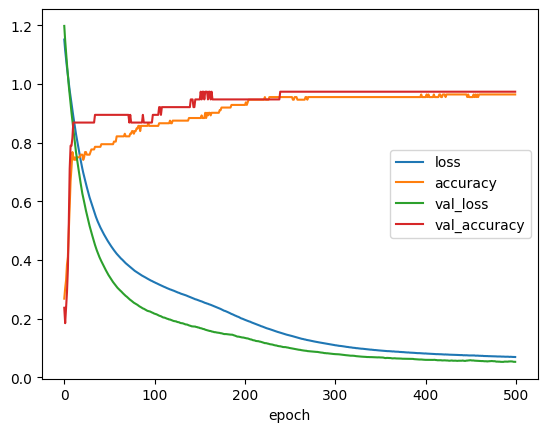

In [9]:
my_cb = callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)
my_history = my_model.fit(
    x=X,
    y=y,
    validation_split=0.25,
    batch_size=10,
    epochs=500,
    callbacks=[my_cb],
    verbose=0
)

tmp = pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch')

In [10]:
tmp.iloc[-1, ]

loss            0.068889
accuracy        0.964286
val_loss        0.052459
val_accuracy    0.973684
Name: 499, dtype: float64

In [11]:
tmp = my_model.predict(X)
y_ = np.argmax(tmp, axis=-1)
(y_ == y).mean()

5/5 [==============================] - 0s 2ms/step


0.9666666666666667

In [12]:
# 11.2.2 補足：交差エントロピー
-np.log([0.8, 0.7, 0.3, 0.8]).mean()

0.5017337127232719

In [14]:
-np.log([0.7, 0.6, 0.2, 0.7]).mean()

0.708403356019389

In [15]:
y = [2, 1, 0, 1]
y_1 = [
    [0.1, 0.1, 0.8],
    [0.1, 0.7, 0.2],
    [0.3, 0.4, 0.3],
    [0.1, 0.8, 0.1]
]
y_2 = [
    [0.1, 0.2, 0.7],
    [0.2, 0.6, 0.2],
    [0.2, 0.5, 0.3],
    [0.2, 0.7, 0.1]
]

In [17]:
[
    losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_1).numpy().mean(),
    losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_2).numpy().mean()
]

[0.5017337, 0.70840335]

In [1]:
# 11.3 MNIST:手書き数字の分類
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from random import sample
from keras import callbacks, layers, models
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
np.set_printoptions(linewidth=170)
x_train[4, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

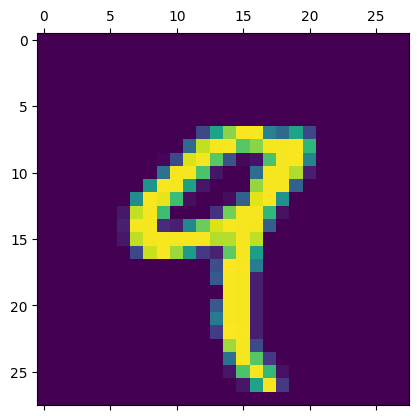

In [4]:
plt.matshow(x_train[4, :, :])

In [5]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_train.min(), x_train.max()

(0, 255)

In [7]:
x_train = x_train /255
x_test  = x_test /255

In [8]:
my_index = sample(range(60000), 6000)
x_train = x_train[my_index, :, :]
y_train = y_train[my_index]

In [9]:
my_model = models.Sequential()
my_model.add(layers.Flatten(input_shape=[28,28]))
my_model.add(layers.Dense(units=256, activation='relu'))
my_model.add(layers.Dense(units=10, activation='softmax'))

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
my_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
my_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

<Axes: xlabel='epoch'>

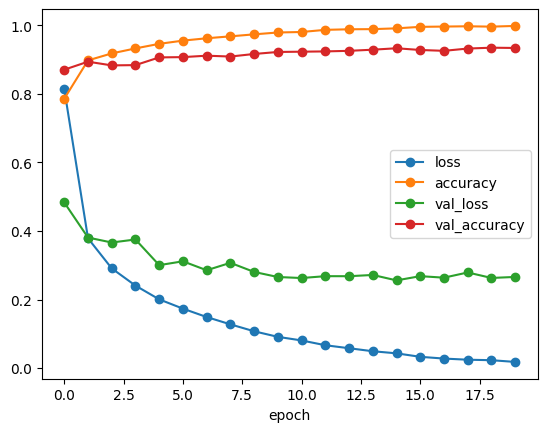

In [11]:
my_history = my_model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[my_cb],
    verbose=0
)
tmp = pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch', style='o-')

In [12]:
tmp = my_model.predict(x_test)
y_ = np.argmax(tmp, axis=-1)
confusion_matrix(y_true=y_test, y_pred=y_)

313/313 [==============================] - 1s 2ms/step


array([[ 963,    0,    1,    1,    0,    3,    7,    1,    2,    2],
       [   0, 1121,    4,    1,    0,    1,    4,    1,    3,    0],
       [   8,    2,  970,   10,    8,    1,    6,    8,   17,    2],
       [   2,    0,   13,  934,    2,    9,    1,    9,   13,   27],
       [   1,    0,    3,    0,  933,    1,    9,    2,    4,   29],
       [  10,    1,    0,   23,   11,  793,   19,    3,   17,   15],
       [   8,    3,    1,    2,   12,   14,  911,    2,    5,    0],
       [   3,    7,   19,    5,    7,    0,    0,  956,    0,   31],
       [   9,    6,    7,   17,   10,    7,    8,   11,  878,   21],
       [  11,    6,    1,    8,   25,    0,    1,    5,    2,  950]])

In [13]:
(y_ == y_test).mean()

0.9409

In [14]:
my_model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2046 - accuracy: 0.9409


[0.2046373188495636, 0.9409000277519226]

In [15]:
x_train2d = x_train.reshape(-1, 28, 28, 1)
x_test2d  = x_test.reshape(-1, 28, 28, 1)

In [16]:
my_model = models.Sequential()
my_model.add(layers.Conv2D(filters=32, # 畳み込み層
                           kernel_size=3,
                           activation='relu',
                           input_shape=[28, 28, 1]))
my_model.add(layers.MaxPooling2D(pool_size=2)) # プーリング層
my_model.add(layers.Flatten())
my_model.add(layers.Dense(128, activation='relu'))
my_model.add(layers.Dense(10,  activation='softmax'))

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [17]:
my_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
from keras.callbacks import EarlyStopping
my_cb = EarlyStopping(patience=5,
                      restore_best_weights=True)

<Axes: xlabel='epoch'>

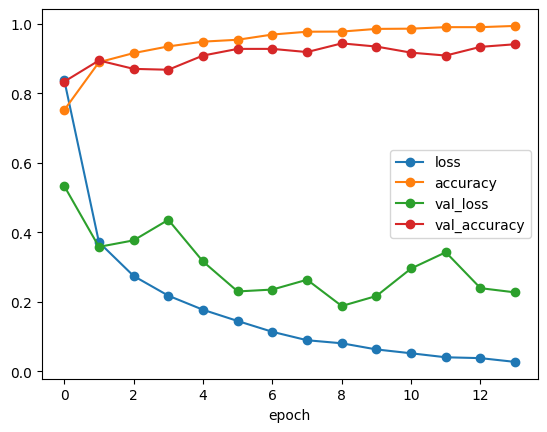

In [18]:
my_history = my_model.fit(
    x=x_train2d,
    y=y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=my_cb,
    verbose=0
)

tmp = pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch', style='-o')

In [20]:
my_model.evaluate(x=x_test2d, y=y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1369 - accuracy: 0.9590


[0.13686907291412354, 0.9589999914169312]

In [26]:
# 11.3.3.2 LeNet

my_model = models.Sequential()
my_model.add(layers.Conv2D(filters=20, # 畳み込み層
                           kernel_size=5,
                           activation='relu',
                           input_shape=[28, 28, 1]))
my_model.add(layers.MaxPooling2D(pool_size=2, strides=2)) # プーリング層
my_model.add(layers.Conv2D(filters=20, kernel_size=5, activation='relu'))
my_model.add(layers.MaxPooling2D(pool_size=2, strides=2))
my_model.add(layers.Dropout(rate=0.25))
my_model.add(layers.Flatten())
my_model.add(layers.Dense(500, activation='relu'))
my_model.add(layers.Dropout(rate=0.5))
my_model.add(layers.Dense(10,  activation='softmax'))

my_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

mv_cb = callbacks.EarlyStopping(patience=5,
                                restore_best_weights=True)

<Axes: xlabel='epoch'>

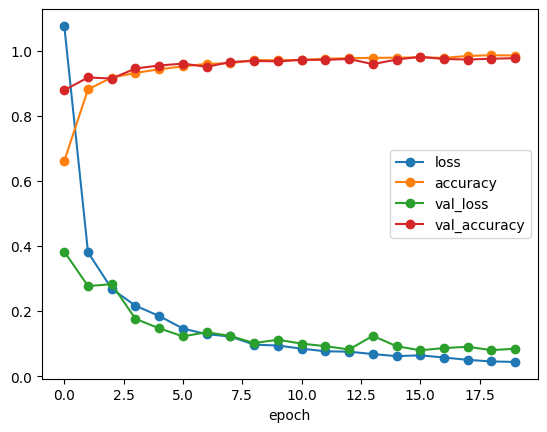

In [27]:
my_history = my_model.fit(
    x=x_train2d,
    y=y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=my_cb,
    verbose=0
)

tmp = pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch', style='-o')

In [28]:
my_model.evaluate(x=x_test2d, y=y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0602 - accuracy: 0.9831


[0.06022321805357933, 0.9830999970436096]

In [29]:
# 11.3.3.3 補足j：LeNetが自信満々で間違う例
y_prob = my_model.predict(x_test2d)

tmp = pd.DataFrame({
    'y_prob':np.max(y_prob, axis=1),
    'y_':np.argmax(y_prob, axis=1),
    'y':y_test,
    'id':range(len(y_test))
})
tmp = tmp[tmp.y_ != tmp.y]
my_result = tmp.sort_values('y_prob', ascending=False)

313/313 [==============================] - 3s 10ms/step


In [30]:
my_result.head()

,y_prob,y_,y,id
3520,0.999998,4,6,3520
1754,0.999775,2,7,1754
3073,0.999738,2,1,3073
449,0.999590,5,3,449
2035,0.999318,3,5,2035


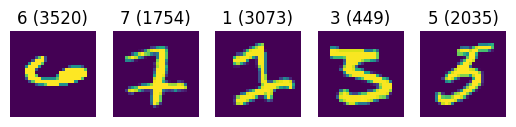

In [32]:
for i in range(5):
  plt.subplot(1, 5, i + 1)
  ans = my_result['y'].iloc[i]
  id = my_result['id'].iloc[i]
  plt.title(f'{ans} ({id})')
  plt.imshow(x_test[id])
  plt.axis('off')


In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.1-py2.py3-none-any.whl size=249152215 sha256=baa6e093dd9a60d1b55548a371c44481af302c53d2cc0fc1cd353dff3317c762
  Stored in directory: /root/.cache/pip/wheels/2e/2f/04/ef0554c89bcb5d38a6fc082a87f497933109faefd94dcdc3d2
Successfully built h2o


In [5]:
# 11.4 AutoML
import h2o
import pandas as pd
import tensorflow as tf
from h2o.automl import H2OAutoML
from random import sample

h2o.init()
h2o.no_progress()
#h2o.cluster.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 20 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_sq97ra
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
my_url = (
    'https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
my_frame = h2o.H2OFrame(my_data) # 通常のデータフレームをH2OFrameに変換する


In [10]:
my_frame.head(5)

LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
-0.99868,600,17.1167,160,31
-0.4544,690,16.7333,80,30
-0.80796,502,17.15,130,28
-1.50926,420,16.1333,110,26
-1.71655,582,16.4167,187,25


In [11]:
# 11.4.3 AutoMLによる回帰
my_model = H2OAutoML(
    max_runtime_secs=60
)
my_model.train(
    y='LPRICE2',
    training_frame=my_frame
)


08:23:06.835: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 27.0.



Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230709_82302_model_3


Status of Neuron Layers: predicting LPRICE2, regression, gaussian distribution, Quadratic loss, 601 weights/biases, 11.3 KB, 20 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ---------------------  -----------------------
    1        4        Input             5.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.020778198660700582   0.03418470919132233    0.0         -0.010052448974893196  0.13505011796951294  0.49966290125160406    0.015246424823999405
    3        1        Linear                       0.0   0.0   0.0019969903968740255  0.0006678830832242966  0.0         0.005429804789600894   0.14198791980743408  -0.023975314363037598  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.26931287673406185
RMSE: 0.5189536364012317
MAE: 0.4451972736457659
RMSLE: NaN
Mean Residual Deviance: 0.26931287673406185

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.08113237646128706
RMSE: 0.2848374562119369
MAE: 0.23182572538523732
RMSLE: NaN
Mean Residual Deviance: 0.08113237646128706

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.267288  0.11614    0.262238      0.302709      0.0997882     0.423074      0.248634
mean_residual_deviance  0.113208  0.0744412  0.108948      0.110841      0.016764      0.226099      0.103389
mse                     0.113208  0.0744412  0.108948      0.110841      0.016764      0.226099      0.103389
r2                      0.427124  0.515276   0.72634       0.739109      0.930741      -0.122106     -0.138464
residual_deviance       0.113208  0.0744412  0.108948      0.110841      0.016764      0.226099      0.103389
rmse                    0.317903  0.123215   0.330072      0.332927      0.129476      0.475499      0.321541
rmsle                   nan       0          nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-07-09 08:23:59  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-07-09 08:23:59  6.618 sec   6666 obs/sec      0.740741  1             20         0.518954         0.269313             0.445197        0.305514

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
TIME_SV     1                      1                    0.289012
WRAIN       0.85861                0.85861              0.248149
HRAIN       0.819486               0.819486             0.236841
DEGREES     0.781967               0.781967             0.225998

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [12]:
my_model.leaderboard['rmse'].min()

0.2848374562119369

<Axes: xlabel='y', ylabel='y_'>

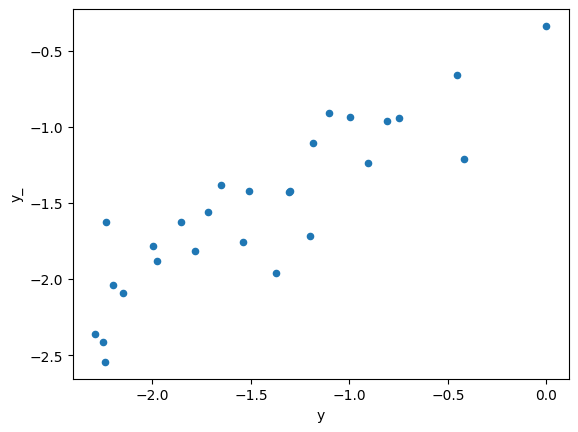

In [13]:
tmp = h2o.as_list(
    my_model.predict(my_frame)
)
pd.DataFrame({
    'y'  : my_data['LPRICE2'],
    'y_' : tmp['predict']
}).plot('y', 'y_', kind='scatter')

In [15]:
# 11.4.4 AutoMLによる分類
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
my_index = sample(range(60000), 6000)
x_train = x_train[my_index, :, :]
y_train = y_train[my_index]

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
tmp = pd.DataFrame(
    x_train.reshape(-1, 28 * 28)
)
y = 'y'
tmp[y] = y_train
my_train = h2o.H2OFrame(tmp)
my_train[y] = my_train[y].asfactor()

tmp = pd.DataFrame(
    x_test.reshape(-1, 28 * 28)
)
my_test = h2o.H2OFrame(tmp)

In [18]:
my_model = H2OAutoML(
    max_runtime_secs=120
)
my_model.train(
    y=y,
    training_frame=my_train
)


08:41:15.354: _train param, Dropping bad and constant columns: [196, 197, 110, 111, 112, 113, 476, 751, 114, 752, 753, 754, 755, 756, 757, 758, 759, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 364, 2, 3, 4, 642, 5, 643, 6, 644, 7, 645, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 252, 253, 531, 532, 139, 779, 419, 30, 31, 32, 33, 34, 140, 141, 780, 781, 782, 420, 783, 700, 701, 702, 308, 48, 49, 391, 392, 670, 671, 672, 673, 559, 50, 51, 52, 53, 54, 55, 56, 57, 59, 280, 281, 560, 167, 168, 169, 448, 449, 724, 725, 61, 726, 727, 728, 729, 697, 730, 698, 731, 336, 699, 615, 616, 617, 224, 587, 225, 588, 589, 80, 503, 81, 504, 82, 83, 84, 85]


08:41:50.365: _train param, Dropping bad and constant columns: [196, 197, 110, 111, 112, 113, 476, 751, 114, 752, 753, 754, 755, 756, 757, 758, 759, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 364, 2, 3, 4, 642, 5, 643, 6, 644, 7, 645, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 252, 253, 531, 532, 139, 779, 419, 30, 31, 32, 33, 34, 140, 14

key,value
Stacking strategy,blending
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [19]:
my_model.leaderboard[
    'mean_per_class_error'
].min()

0.09235357827393614

In [20]:
tmp = h2o.as_list(
    my_model.predict(my_test)
)
y_ = tmp.predict
(y_ == y_test).mean()

0.9234